In [1]:
import snapatac2 as snap
import scanpy as sc
import pandas as pd 
import pybedtools 
import numpy as np
snap.__version__

'2.3.0.dev3'

In [8]:
# Newly converted fragment file to h5ad object; see other script
data = snap.read("/ceph/rimlsfnwi/data/moldevbio/zhou/jarts/jupyter_notebooks/sci_test.h5ad")

In [60]:
import scipy.sparse
import matplotlib.pylab as plt

In [30]:
#example for below plot A = sparse.eye(100)

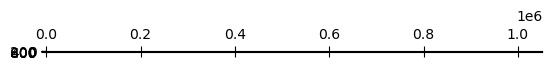

In [54]:
plt.spy(a)

In [61]:
data.X.eliminate_zeros()
n_genes = data.X.getnnz(axis=1)

AttributeError: 'builtins.PyArrayElem' object has no attribute 'eliminate_zeros'

In [55]:
a = data.X[:,:]

In [56]:
x = a.todense()
print(x)

MemoryError: Unable to allocate 1.01 TiB for an array with shape (131712, 1051641) and data type int64

In [53]:
np.ravel((a[600,:] != 0).sum(axis=1))

array([1])

In [18]:
#data.obs['cell']
data.obs['cell'].value_counts()

,counts
cat,u32
"""GAATTCGTCTCTCC...",2
"""ATTCAGAATCCTGA...",1
"""CGCTCATTAGAGAG...",2
"""GAGATTCCTAAGGC...",1
"""GAGATTCCCGAGGC...",20
"""CTGATGCTCGTACT...",1
"""GAGATCCGCCTGAG...",1
"""ATTCAGAAGTAGAG...",2
"""TAACGCGCCGCCCT...",1


In [7]:
data.X

CsrMatrix(i64) element, cache_enabled: no, cached: no

In [3]:
df_obs = pd.DataFrame(data.obs['cell'])

In [35]:
df_obs.value_counts()

GAGATTCCGGACTCCTCTAAGCCTTATAGCCT    1029
GAGATTCCTCCTGAGCAAGGAGTATATAGCCT    1022
CGGCTATGTAAGGCGATAGATCGCTATAGCCT    1018
GAGATTCCTAAGGCGAAGAGTAGATAATCTTA     980
GAGATTCCCGTACTAGCTCTCTATATAGAGGC     951
                                    ... 
CCAGAAAGAGGCAGAAGTAAGGAGCCTATCCT       1
CCACTCTCAAAAAGGAAGAGTAGACAGGACGT       1
CCACTCCTGAAGAGGACTCTCTATCCTATCCT       1
CCACGGGGAAGGCGAATAGATCGCTATAGCCT       1
TTTTAGGCAGGGGGCACTAAGCCTTATACCCA       1
Length: 23204, dtype: int64

In [4]:
1 in data.obs['cell'] #or (data.obs['cell'] == '0').all()

False

In [10]:
#Vector/list
boolean = ['True', 'False']

In [ ]:
#Eventually place data_X[:,:boolean]/promoter_matrix_X

In [40]:
#For cell in data.obs
#Calculate total regions (not 0) from data.X
#Then which are promoter region
#For each cell percentage ((data_X[:,:boolean])/promoter_matrix_X)
for cell in data.obs['cell']:
    if df_obs[cell] != 0:
        print(np.sum(data.X))
    else: print('Contains 0')

In [8]:
data_X = np.array(data.X)
# Cell and region need to be set as indices for .obs and .var

In [25]:
data_X = data.X[:50,:] #Try select all the ones that are true df.loc

In [43]:
#data_X = data_X.tocsc()

In [26]:
data_X

<50x1051641 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [24]:
for i in range(50):
    #print(i)
    p = data_X[i,:]
    print(np.sum(p[p>0]))
    #ones = np.ones(i)
    #print(ones)
    #print(ones.sum(1))

In [27]:
#data_X.tocsc()

<20x1051641 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Column format>

In [15]:
data.X.shape

[131712, 1051641]

In [4]:
data.obs['cell']

""
cat
"""GAAATTGCTAAAGA..."
"""GAGATTCCTAAGGC..."
"""CTGAAGCTGTAGAG..."
"""CTGAAGCTGCTACG..."
"""ATTCAGAATCCTGA..."
"""CTGAAGCTTAGGCA..."
"""TCCGGAGAAAGAGG..."
"""CGCTCATTTAAGGC..."
"""AGCGATAGGGACTC..."


In [4]:
df1 = pd.DataFrame(data.obs['cell'])

In [5]:
df1

,0
0,GAAATTGCTAAAGAGAAGAGTAGATAATCTTA
1,GAGATTCCTAAGGCGACTCTCTATGGCTCTGA
2,CTGAAGCTGTAGAGGATATCCTCTCTAATCTT
3,CTGAAGCTGCTACGCTTATCCTCTTAATCTTA
4,ATTCAGAATCCTGAGCTAGATCGCGGCTCTGA
...,...
131707,ATTCAGAACGAGGCTGAGAGTAGAGTACTGAC
131708,ATTACTCGAAGAGGCAAAGGAGTATAATCTTA
131709,CGCTCATTCGTACTAGGTAAGCAGTGCTCTTA
131710,CGCTCATTCGTACTAGGTAAGGAGGGCTCTGA


In [3]:
data.var['region']

""
cat
"""chr10:10000114..."
"""chr10:10000540..."
"""chr10:10000595..."
"""chr10:10000600..."
"""chr10:10000644..."
"""chr10:10000651..."
"""chr10:10000671..."
"""chr10:10000677..."
"""chr10:10000865..."


In [4]:
df = pd.DataFrame(data.var['region'])
#columns = ['index', 'region']
df
#Try reorder before running overlap functions
#Rerun command line first: Redo bed tools overlap, in reverse (look into the bed file overlap process to see if you need to change any parameters)

,0
0,chr10:100001148-100001307
1,chr10:100005405-100005678
2,chr10:100005950-100006443
3,chr10:100006001-100006483
4,chr10:100006443-100006637
...,...
1051636,chr6:64216124-64216756
1051637,chr6:64217776-64217867
1051638,chr6:64218812-64219039
1051639,chr6:64227458-64228136


In [6]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [14]:
intersect = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/final_intersect.bed", delimiter='\t', header=None)
intersect
#I will join this lower in the work book, then come back here

,0
0,chr1:41003490-41003764
1,chr1:212688221-212688384
2,chr1:212690070-212690279
3,chr1:212691258-212691496
4,chr1:212691595-212691938
...,...
753998,chr6:145630952-145631062
753999,chr6:145630859-145631056
754000,chr6:145630827-145630903
754001,chr6:145629062-145629141


In [26]:
#INTERSECTION FROM HERE
#option 1
#d1 = pd.DataFrame(df)
#d2 = pd.DataFrame(intersect_concat)

In [27]:
#print(d1)

                                 0
0        chr10:100001148-100001307
1        chr10:100005405-100005678
2        chr10:100005950-100006443
3        chr10:100006001-100006483
4        chr10:100006443-100006637
...                            ...
1051636     chr6:64216124-64216756
1051637     chr6:64217776-64217867
1051638     chr6:64218812-64219039
1051639     chr6:64227458-64228136
1051640     chr6:64233908-64234174

[1051641 rows x 1 columns]


In [28]:
#print(d2)

                              0
0              chr1:14403-29570
1            chr1:185216-195411
2            chr1:257912-268816
3            chr1:258143-359681
4            chr1:258523-268816
...                         ...
155750  chr22:50783253-50799305
155751  chr22:50783756-50799434
155752  chr22:50783774-50788954
155753  chr22:50783796-50789353
155754  chr22:50783811-50789172

[155755 rows x 1 columns]


In [31]:
#irsect_concat_df = pd.merge(d1, d2 how ='inner', on =[0])
#prinyintersect_concat_df)

In [29]:
#Option 2
#overlap = intersect_concat.isin(df)

In [27]:
#overlap

In [34]:
#overlap_2 = df.isin(intersect_concat) #dont know how to check if there are any true or are there just false

In [26]:
#overlap_2

In [37]:
#Option 3
#prom_overlap = df.equals(intersect_concat) #Only does it once, not over all rows

In [38]:
#prom_overlap

False

In [23]:
df[0]

0          chr10:100001148-100001307
1          chr10:100005405-100005678
2          chr10:100005950-100006443
3          chr10:100006001-100006483
4          chr10:100006443-100006637
                     ...            
1051636       chr6:64216124-64216756
1051637       chr6:64217776-64217867
1051638       chr6:64218812-64219039
1051639       chr6:64227458-64228136
1051640       chr6:64233908-64234174
Name: 0, Length: 1051641, dtype: object

In [24]:
#Option 4 (ChatGPT)
df['overlap'] = df[0].isin(intersect[0]).astype(bool)

In [25]:
df # comb.loc[:, criteria] #percentages to be added

,0,overlap
0,chr10:100001148-100001307,True
1,chr10:100005405-100005678,True
2,chr10:100005950-100006443,True
3,chr10:100006001-100006483,True
4,chr10:100006443-100006637,True
...,...,...
1051636,chr6:64216124-64216756,True
1051637,chr6:64217776-64217867,True
1051638,chr6:64218812-64219039,True
1051639,chr6:64227458-64228136,True


In [28]:
df[0].isin(intersect[0]).value_counts()

True     754003
False    297638
Name: 0, dtype: int64

In [29]:
intersect[0].isin(df[0]).value_counts()

True    754003
Name: 0, dtype: int64

In [30]:
df.to_csv('real_final_overlap.tsv', sep="\t", index=False, header=False)

In [49]:
data.var['region'] #Must figure out how to add to the .var version as the changes are only present on the dataframe version

""
cat
"""chr10:10000114..."
"""chr10:10000540..."
"""chr10:10000595..."
"""chr10:10000600..."
"""chr10:10000644..."
"""chr10:10000651..."
"""chr10:10000671..."
"""chr10:10000677..."
"""chr10:10000865..."


In [52]:
df.to_csv('df_overlap.tsv', sep="\t", index=False, header=False)

In [ ]:
df_overlap = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/df_overlap.bed", delimiter='\t', header=None)

In [48]:
df['overlap'].value_counts()

False    1051641
Name: overlap, dtype: int64

In [31]:
#adata.var.to_csv(filename)
df.to_csv('data_regions.csv', sep = '\t')
#pd.DataFrame.to_csv('data_regions.tsv', sep='\t')
#write regions to a csv (tab one) and use that in command line, change tsv to bed and try use intersect between the region one and the promoter bed file

In [46]:
bed_regions = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/data_regions.bed", delimiter='\t', index_col=0)

In [47]:
bed_regions

,0
0,chr10:100001148-100001307
1,chr10:100005405-100005678
2,chr10:100005950-100006443
3,chr10:100006001-100006483
4,chr10:100006443-100006637
...,...
1051636,chr6:64216124-64216756
1051637,chr6:64217776-64217867
1051638,chr6:64218812-64219039
1051639,chr6:64227458-64228136


In [56]:
bed_regions = bed_regions['0'].str.split(':',expand=True)

In [59]:
bed_regions

,0,1
0,chr10,100001148-100001307
1,chr10,100005405-100005678
2,chr10,100005950-100006443
3,chr10,100006001-100006483
4,chr10,100006443-100006637
...,...,...
1051636,chr6,64216124-64216756
1051637,chr6,64217776-64217867
1051638,chr6,64218812-64219039
1051639,chr6,64227458-64228136


In [66]:
start_stop = bed_regions[1].str.split('-',expand=True)
start_stop

,0,1
0,100001148,100001307
1,100005405,100005678
2,100005950,100006443
3,100006001,100006483
4,100006443,100006637
...,...,...
1051636,64216124,64216756
1051637,64217776,64217867
1051638,64218812,64219039
1051639,64227458,64228136


In [68]:
bed_regions['start'] = start_stop[0]

In [70]:
bed_regions ['stop'] = start_stop[1]

In [71]:
bed_regions

,0,1,start,stop
0,chr10,100001148-100001307,100001148,100001307
1,chr10,100005405-100005678,100005405,100005678
2,chr10,100005950-100006443,100005950,100006443
3,chr10,100006001-100006483,100006001,100006483
4,chr10,100006443-100006637,100006443,100006637
...,...,...,...,...
1051636,chr6,64216124-64216756,64216124,64216756
1051637,chr6,64217776-64217867,64217776,64217867
1051638,chr6,64218812-64219039,64218812,64219039
1051639,chr6,64227458-64228136,64227458,64228136


In [73]:
bed_regions.drop(columns=[1]) #Stupid, you forgot to say inplace=true which now becomes an issue later XD

,0,start,stop
0,chr10,100001148,100001307
1,chr10,100005405,100005678
2,chr10,100005950,100006443
3,chr10,100006001,100006483
4,chr10,100006443,100006637
...,...,...,...
1051636,chr6,64216124,64216756
1051637,chr6,64217776,64217867
1051638,chr6,64218812,64219039
1051639,chr6,64227458,64228136


In [79]:
bed_regions.columns = ['chr', 'remove', 'start', 'stop']

In [80]:
bed_regions #it popped back up cuz i didnt say in_place=true before

,chr,remove,start,stop
0,chr10,100001148-100001307,100001148,100001307
1,chr10,100005405-100005678,100005405,100005678
2,chr10,100005950-100006443,100005950,100006443
3,chr10,100006001-100006483,100006001,100006483
4,chr10,100006443-100006637,100006443,100006637
...,...,...,...,...
1051636,chr6,64216124-64216756,64216124,64216756
1051637,chr6,64217776-64217867,64217776,64217867
1051638,chr6,64218812-64219039,64218812,64219039
1051639,chr6,64227458-64228136,64227458,64228136


In [83]:
bed_regions.drop(columns=['remove'], inplace=True)

In [85]:
bed_regions

,chr,start,stop
0,chr10,100001148,100001307
1,chr10,100005405,100005678
2,chr10,100005950,100006443
3,chr10,100006001,100006483
4,chr10,100006443,100006637
...,...,...,...
1051636,chr6,64216124,64216756
1051637,chr6,64217776,64217867
1051638,chr6,64218812,64219039
1051639,chr6,64227458,64228136


In [86]:
bed_regions.to_csv('final_regions.tsv', sep="\t")
#YAYYYYYYY done!

In [2]:
final_regions = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/final_regions.bed", delimiter='\t', index_col=0)

In [3]:
final_regions

,chr,start,stop
0,chr10,100001148,100001307
1,chr10,100005405,100005678
2,chr10,100005950,100006443
3,chr10,100006001,100006483
4,chr10,100006443,100006637
...,...,...,...
1051636,chr6,64216124,64216756
1051637,chr6,64217776,64217867
1051638,chr6,64218812,64219039
1051639,chr6,64227458,64228136


In [4]:
final_regions = final_regions.sort_values(by = 'chr')

In [6]:
final_regions.to_csv('final_regions_sorted.tsv', sep="\t")

# How it should be going to look like:

In [4]:
query = sc.read("/ceph/rimlsfnwi/data/moldevbio/zhou/jarts/jupyter_notebooks/pbmc.h5ad")
query

AnnData object with n_obs × n_vars = 570 × 6176550
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_score', 'is_doublet'
    var: 'selected'
    uns: 'reference_sequences', 'scrublet_sim_doublet_score', 'scrublet_threshold', 'spectral_eigenvalue'
    obsm: 'X_spectral', 'insertion'

In [5]:
query.obs

,tsse,n_fragment,frac_dup,frac_mito,doublet_score,is_doublet
index,,,,,,
TAGCCGGCAGGATAGC-1,25.757576,1736,0.350299,0.0,0.025000,False
ATGTTTCGTATGGGTG-1,31.259968,1070,0.079966,0.0,0.022133,False
CTTAATCTCTTGTGCC-1,27.424604,17169,0.596527,0.0,0.058140,False
GAGTGAGCATGTATCG-1,35.903614,19867,0.824402,0.0,0.070968,False
TTGGTCCGTACGTATC-1,26.686217,2703,0.440257,0.0,0.031390,False
...,...,...,...,...,...,...
ACTGTCCTCTCTTAAC-1,21.646226,15639,0.771122,0.0,0.086957,False
GGTGAAGTCACTACCC-1,23.855390,16662,0.740322,0.0,0.034965,False
TGAGCCGAGGAAGGTA-1,38.998682,3666,0.332848,0.0,0.022133,False


In [6]:
query.var

,selected
index,
chr1:0-500,False
chr1:500-1000,False
chr1:1000-1500,False
chr1:1500-2000,False
chr1:2000-2500,False
...,...
chrY:57225000-57225500,False
chrY:57225500-57226000,False
chrY:57226000-57226500,False


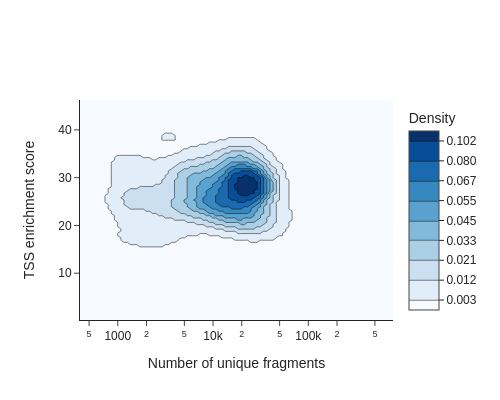

In [7]:
# Plot should look similar to this
snap.pl.tsse(query, interactive=False)

In [6]:
bed_promoter = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/jarts/promoter.bed", delimiter='\t', header= None) 

In [7]:
bed_promoter

,0,1,2,3,4,5,6,7,8,9,10,11
0,chr1,11868,14409,ENST00000456328.2,0,+,11868,11868,"255,51,255",3,"359,109,1189,","0,744,1352,"
1,chr1,12009,13670,ENST00000450305.2,0,+,12009,12009,"255,51,255",6,"48,49,85,78,154,218,","0,169,603,965,1211,1443,"
2,chr1,14403,29570,ENST00000488147.1,0,-,14403,14403,"255,51,255",11,"98,34,152,159,198,136,137,147,99,154,37,","0,601,1392,2203,2454,2829,3202,3511,3864,10334..."
3,chr1,17368,17436,ENST00000619216.1,0,-,17368,17368,"0,100,0",1,"68,","0,"
4,chr1,29553,31097,ENST00000473358.1,0,+,29553,29553,"0,100,0",3,"486,104,122,","0,1010,1422,"
...,...,...,...,...,...,...,...,...,...,...,...,...
232179,chr22_KI270734v1_random,59710,60316,ENST00000615362.1,0,+,59710,59710,"255,51,255",2,"468,135,","0,471,"
232180,chr22_KI270734v1_random,72410,74814,ENST00000617983.1,0,+,72837,74124,"12,12,120",1,"2404,","0,"
232181,chr22_KI270734v1_random,131493,137392,ENST00000613204.1,0,+,131645,136994,"12,12,120",5,"262,161,101,141,548,","0,342,3949,4665,5351,"
232182,chr22_KI270734v1_random,138081,161750,ENST00000615165.1,0,-,138479,156446,"12,12,120",14,"586,89,99,176,147,93,82,80,117,65,150,35,209,62,","0,661,4112,5532,6667,6922,8558,9542,10034,1033..."


In [13]:
type(bed_promoter)

pandas.core.frame.DataFrame

In [15]:
final_bed_promoter = bed_promoter.iloc[:,[0,1,2]]

In [16]:
final_bed_promoter

,0,1,2
0,chr1,11868,14409
1,chr1,12009,13670
2,chr1,14403,29570
3,chr1,17368,17436
4,chr1,29553,31097
...,...,...,...
232179,chr22_KI270734v1_random,59710,60316
232180,chr22_KI270734v1_random,72410,74814
232181,chr22_KI270734v1_random,131493,137392
232182,chr22_KI270734v1_random,138081,161750


In [17]:
final_bed_promoter.columns = ['chr', 'start', 'stop']

In [19]:
final_bed_promoter

,chr,start,stop
0,chr1,11868,14409
1,chr1,12009,13670
2,chr1,14403,29570
3,chr1,17368,17436
4,chr1,29553,31097
...,...,...,...
232179,chr22_KI270734v1_random,59710,60316
232180,chr22_KI270734v1_random,72410,74814
232181,chr22_KI270734v1_random,131493,137392
232182,chr22_KI270734v1_random,138081,161750


In [20]:
final_bed_promoter.to_csv('final_bed_promoter.tsv', sep="\t")

In [9]:
# def h5ed_to_bed(h5ed_file, bed_file):
#     # Load the .h5ed file
#     h5ed = pybedtools.BedTool(h5ed_file)

#     # Convert to .bed file
#     h5ed.saveas(bed_file)

# input_file = "/ceph/rimlsfnwi/data/moldevbio/zhou/jarts/jupyter_notebooks/sci_test.h5ad"
# output_file = "all_regions.bed"

# h5ed_to_bed(input_file, output_file)

## Start from here

In [15]:
bed_promoter = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/final_bed_promoter.bed", delimiter='\t', header=None, index_col=0)
#bed_promoter.drop(columns=['Unnamed: 0'], inplace=True)
bed_promoter

,1,2,3
0,,,
0,chr1,11868,14409
1,chr1,12009,13670
2,chr1,14403,29570
3,chr1,17368,17436
4,chr1,29553,31097
...,...,...,...
232179,chr22_KI270734v1_random,59710,60316
232180,chr22_KI270734v1_random,72410,74814
232181,chr22_KI270734v1_random,131493,137392


In [16]:
bed_promoter.to_csv('real_final_bed_promoter.tsv', sep="\t", index=False, header=False)

In [8]:
sorted_regions = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/real_final_sorted_regions.bed", delimiter='\t', header=0, index_col=0)
#sorted_regions.drop(columns=[0], inplace=True) 
sorted_regions

,1,2,3
0,chr1,41003490,41003764
1,chr1,212678749,212678834
2,chr1,212678768,212678862
3,chr1,212678808,212679214
4,chr1,212678831,212678882
...,...,...,...
1051636,chr6,145630952,145631062
1051637,chr6,145630859,145631056
1051638,chr6,145630827,145630903
1051639,chr6,145629062,145629141


In [10]:
sorted_regions.to_csv('real_final_sorted_regions.tsv', sep="\t", index=False, header=False)

## Intersect

In [5]:
intersect = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/intersect.bed", delimiter='\t', header=None)
intersect
# Join these again, using : and -
# look into pandas or numpy to calculate overlap (research)
# End up with another column in data.var for if there is a promoter or not

,0,1,2
0,chr1,14403,29570
1,chr1,185216,195411
2,chr1,257912,268816
3,chr1,258143,359681
4,chr1,258523,268816
...,...,...,...
155750,chr22,50783253,50799305
155751,chr22,50783756,50799434
155752,chr22,50783774,50788954
155753,chr22,50783796,50789353


In [8]:
intersect['concat'] = intersect[0].astype(str) + ":" + intersect[1].astype(str) + '-' + intersect[2].astype(str)
print(intersect)

           0          1          2                    concat
0       chr1   41003490   41003764    chr1:41003490-41003764
1       chr1  212688221  212688384  chr1:212688221-212688384
2       chr1  212690070  212690279  chr1:212690070-212690279
3       chr1  212691258  212691496  chr1:212691258-212691496
4       chr1  212691595  212691938  chr1:212691595-212691938
...      ...        ...        ...                       ...
753998  chr6  145630952  145631062  chr6:145630952-145631062
753999  chr6  145630859  145631056  chr6:145630859-145631056
754000  chr6  145630827  145630903  chr6:145630827-145630903
754001  chr6  145629062  145629141  chr6:145629062-145629141
754002  chr6   64233908   64234174    chr6:64233908-64234174

[754003 rows x 4 columns]


In [9]:
intersect[4] = intersect['concat']
intersect

,0,1,2,concat,4
0,chr1,41003490,41003764,chr1:41003490-41003764,chr1:41003490-41003764
1,chr1,212688221,212688384,chr1:212688221-212688384,chr1:212688221-212688384
2,chr1,212690070,212690279,chr1:212690070-212690279,chr1:212690070-212690279
3,chr1,212691258,212691496,chr1:212691258-212691496,chr1:212691258-212691496
4,chr1,212691595,212691938,chr1:212691595-212691938,chr1:212691595-212691938
...,...,...,...,...,...
753998,chr6,145630952,145631062,chr6:145630952-145631062,chr6:145630952-145631062
753999,chr6,145630859,145631056,chr6:145630859-145631056,chr6:145630859-145631056
754000,chr6,145630827,145630903,chr6:145630827-145630903,chr6:145630827-145630903
754001,chr6,145629062,145629141,chr6:145629062-145629141,chr6:145629062-145629141


In [10]:
intersect.drop(columns=["concat"], inplace=True)

In [11]:
intersect_concat = intersect
intersect_concat

,0,1,2,4
0,chr1,41003490,41003764,chr1:41003490-41003764
1,chr1,212688221,212688384,chr1:212688221-212688384
2,chr1,212690070,212690279,chr1:212690070-212690279
3,chr1,212691258,212691496,chr1:212691258-212691496
4,chr1,212691595,212691938,chr1:212691595-212691938
...,...,...,...,...
753998,chr6,145630952,145631062,chr6:145630952-145631062
753999,chr6,145630859,145631056,chr6:145630859-145631056
754000,chr6,145630827,145630903,chr6:145630827-145630903
754001,chr6,145629062,145629141,chr6:145629062-145629141


In [12]:
intersect_concat.drop(columns=[0, 1, 2], inplace=True)
intersect_concat

,4
0,chr1:41003490-41003764
1,chr1:212688221-212688384
2,chr1:212690070-212690279
3,chr1:212691258-212691496
4,chr1:212691595-212691938
...,...
753998,chr6:145630952-145631062
753999,chr6:145630859-145631056
754000,chr6:145630827-145630903
754001,chr6:145629062-145629141


In [13]:
intersect_concat.to_csv('final_intersect.tsv', sep="\t", index=False, header=False)

In [22]:
intersect_concat = pd.read_csv("/ceph/rimlsfnwi/data/moldevbio/zhou/imarais/jupyter_notebook/intersect_final.bed", delimiter='\t', header=None)
intersect_concat

,0
0,chr1:14403-29570
1,chr1:185216-195411
2,chr1:257912-268816
3,chr1:258143-359681
4,chr1:258523-268816
...,...
155750,chr22:50783253-50799305
155751,chr22:50783756-50799434
155752,chr22:50783774-50788954
155753,chr22:50783796-50789353


# Find a way to add the TSS enrichment & add n_fragment for sci_atac data

TSS enrichment (tsse):

Option 1: from all regions, make bed file; overlap it with a promoter.bed file and then if yes give value (either 1 or True). Calculate the number of regions found to overlap in the promoter.bed together with the generated bed file. Calculate the percentage against all reads afterwards.
https://bedtools.readthedocs.io/en/latest/content/tools/intersect.html


Other option: import the promoter.bed file into Python, merge the regions to one string: e.g. -> chr..:number-number. 
Then do the overlap calculation within python of the promoter.bed and the data.var["region"].
package needs to be found which can do this.

Promoter file: "/ceph/rimlsfnwi/data/moldevbio/zhou/jarts/jupyter_notebooks/promoter.bed"

N fragment next week.

Divide it into seperate steps; option 1:
1. regions joined, how to seperate them into three columns?
2. How to save it? tip: bed file is a .tab seperated file
3. command line, how to perform the overlap?
4. I know the regions, e.g. bed file -> how to get it back into python
5. how to add values within the adata.obs (percentage of reads within promoter for each single-cell)
    This should be based on the values within the adata.var (prom regions/all regions within cell * 100)